In [17]:
import pandas as pd
from os import path
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
DATA_DIR = "../../data"

# Load data from SAbDab (Chen) and TAP

In [3]:
chen_data = pd.read_csv(path.join(DATA_DIR, "chen/deduplicated/chen_data.csv"), index_col=0)
chen_data

,Antibody_ID,heavy,light,Y
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,15c8,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,1a0q,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,1a2y,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0
...,...,...,...,...
2404,6s5a,EVKLLESGGGLVQPGGSLKLSCAASGFDFSRYWMNWVRQAPGKGLE...,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,0
2405,6tyb,EVQLVQSGTEVKRPGESLTISCKTSGYSFSGTWISWVRQMPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGISTYLAWYQQKPGKAPKL...,0
2406,6u1t,EVQLVESGGGLVKPGGSLKLSCAASGFTFSSYDMSWVRQTPEKRLE...,DIQMTQSPASQSASLGESVTITCLASQTIGTWLAWYQQKPGKSPQL...,0
2407,7fab,AVQLEQSGPGLVRPSQTLSLTCTVSGTSFDDYYWTWVRQPPGRGLE...,ASVLTQPPSVSGAPGQRVTISCTGSSSNIGAGHNVKWYQQLPGTAP...,0


In [4]:
tap_data = pd.read_csv(path.join(DATA_DIR, "tap/TAP_data.csv"), index_col=0)
tap_data

,heavy,light,CDR_length,PSH,PPC,PNC,SFvCSP,Y
Antibody_ID,,,,,,,,
Abagovomab,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,46,129.7603,0.0000,0.0000,16.32,1
Abituzumab,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,45,115.9106,0.0954,0.0421,-3.10,1
Abrilumab,QVQLVQSGAEVKKPGASVKVSCKVSGYTLSDLSIHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,45,109.6995,0.0000,0.8965,-4.00,1
Actoxumab,QVQLVESGGGVVQPGRSLRLSCAASGFSFSNYGMHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQHKPGKAPKL...,49,112.6290,0.0000,1.1247,3.10,1
Adalimumab,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGIRNYLAWYQQKPGKAPKL...,48,111.2512,0.0485,1.1364,-19.50,1
...,...,...,...,...,...,...,...,...
Visilizumab,QVQLVQSGAEVKKPGASVKVSCKASGYTFISYTMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCSASSSVSYMNWYQQKPGKAPKRL...,46,124.0825,0.1417,0.1812,8.40,1
Vonlerolizumab,EVQLVQSGAEVKKPGASVKVSCKASGYTFTDSYMSWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLNWYQQKPGKAPKL...,44,118.5559,0.2029,0.3046,0.00,1
Zalutumumab,QVQLVESGGGVVQPGRSLRLSCAASGFTFSTYGMHWVRQAPGKGLE...,AIQLTQSPSSLSASVGDRVTITCRASQDISSALVWYQQKPGKAPKL...,52,121.8996,0.0000,1.2505,0.00,1


# Numbering encoding

In [7]:
x_chen = pd.read_csv(path.join(DATA_DIR, "chen/integer_encoding/chen_integer_encoded.csv"), index_col=0)
x_chen.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,271,272,273,274,275,276,277,278,279,280
0,12e8,4,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,0
1,15c8,4,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,0
2,1a0q,4,18,14,10,14,4,16,3,1,...,0,0,0,0,0,0,0,0,0,0
3,1a14,14,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,0
4,1a2y,14,18,14,10,14,4,16,6,13,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_tap = pd.read_csv(path.join(DATA_DIR, "tap/integer_encoding/tap_integer_encoded.csv"))
x_tap.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,271,272,273,274,275,276,277,278,279,280
0,Abagovomab,14,18,9,10,14,4,16,6,1,...,0,0,0,0,0,0,0,0,0,0
1,Abituzumab,14,18,14,10,14,14,16,6,6,...,0,0,0,0,0,0,0,0,0,0
2,Abrilumab,14,18,14,10,18,14,16,6,1,...,0,0,0,0,0,0,0,0,0,0
3,Actoxumab,14,18,14,10,18,4,16,6,6,...,0,0,0,0,0,0,0,0,0,0
4,Adalimumab,4,18,14,10,18,4,16,6,6,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x_chen["label"] = "Chen"
x_tap["label"] = "TAP"
x_data = pd.concat([x_chen, x_tap])
x_data.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,272,273,274,275,276,277,278,279,280,label
0,12e8,4,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,Chen
1,15c8,4,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,Chen
2,1a0q,4,18,14,10,14,4,16,3,1,...,0,0,0,0,0,0,0,0,0,Chen
3,1a14,14,18,14,10,14,14,16,6,1,...,0,0,0,0,0,0,0,0,0,Chen
4,1a2y,14,18,14,10,14,4,16,6,13,...,0,0,0,0,0,0,0,0,0,Chen


In [13]:
x_data.tail()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,272,273,274,275,276,277,278,279,280,label
236,Visilizumab,14,18,14,10,18,14,16,6,1,...,0,0,0,0,0,0,0,0,0,TAP
237,Vonlerolizumab,4,18,14,10,18,14,16,6,1,...,0,0,0,0,0,0,0,0,0,TAP
238,Zalutumumab,14,18,14,10,18,4,16,6,6,...,0,0,0,0,0,0,0,0,0,TAP
239,Zanolimumab,14,18,14,10,14,14,19,6,1,...,0,0,0,0,0,0,0,0,0,TAP
240,Zolbetuximab (Claudiximab),14,18,14,10,14,14,13,6,1,...,0,0,0,0,0,0,0,0,0,TAP


## Plot PCA of both sets

In [10]:
def plot_pca(
    x, y, components, comp_to_plot=[0,1]
):
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(x)
    
    exp_var_pca = pca.explained_variance_ratio_
    cum_sum = np.cumsum(exp_var_pca)
    
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum)), cum_sum, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    plot_pca_precomp(X_pca, y, comp_to_plot)
    return X_pca

In [11]:
def plot_pca_precomp(x_pc, y, comp_to_plot):
    df = pd.DataFrame()
    df['x'] = x_pc[:,comp_to_plot[0]]
    df['y'] = x_pc[:,comp_to_plot[1]]
    df["label"] = y
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        data=df,
        legend="full",
        alpha=0.6,
        palette=['#1f76b4','orange']
    )
    plt.show()

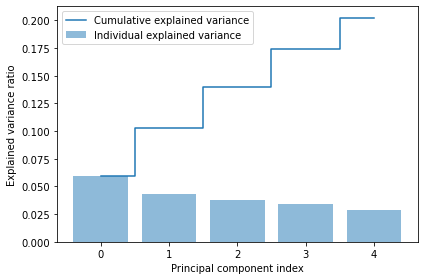

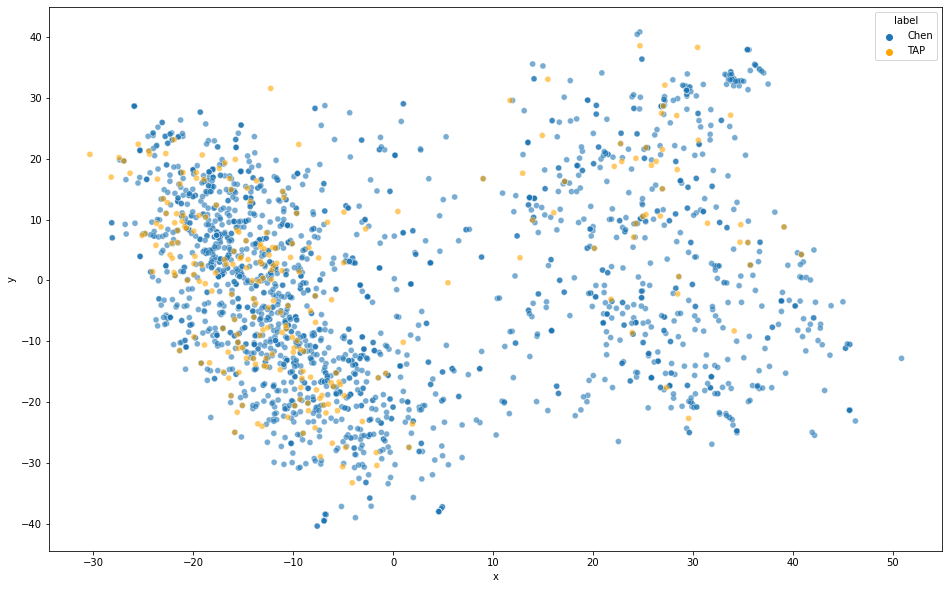

In [19]:
pca_transformed = plot_pca(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=5, comp_to_plot=[0,1])

## Plot t-SNE of both sets

In [20]:
def plot_tsne(
    x, y, components, perplexity, n_iter, metric, comp_to_plot=[0,1]
):
    tsne = TSNE(n_components=components, verbose=1, perplexity=perplexity, n_iter=n_iter, metric=metric)
    X_embedded = tsne.fit_transform(x)
    
    df = pd.DataFrame()
    df['x'] = X_embedded[:,comp_to_plot[0]]
    df['y'] = X_embedded[:,comp_to_plot[1]]
    df["label"] = y

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        data=df,
        legend="full",
        alpha=0.6,
        palette=['#1f76b4','orange']
    )
    plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2650 samples in 0.001s...
[t-SNE] Computed neighbors for 2650 samples in 0.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2650
[t-SNE] Computed conditional probabilities for sample 2000 / 2650
[t-SNE] Computed conditional probabilities for sample 2650 / 2650
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.236549
[t-SNE] KL divergence after 300 iterations: 1.285982


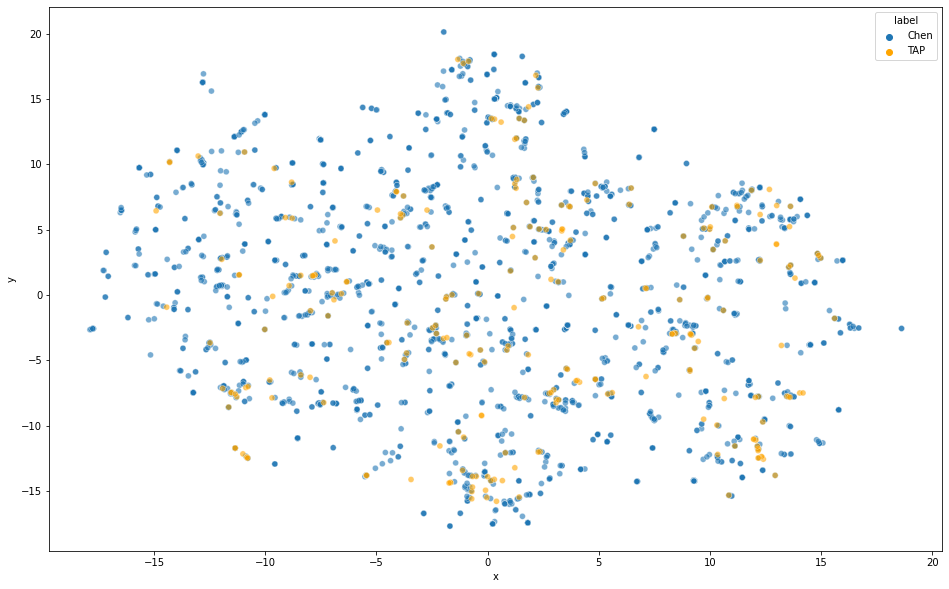

In [22]:
plot_tsne(x_data.drop(["Ab_ID", "label"], axis=1), list(x_data["label"]), components=2, perplexity=40, n_iter=300, metric="euclidean")